# Anchor residue selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from IPython.display import display, Markdown

from opencadd.databases.klifs import setup_remote
from opencadd.databases.klifs.utils import metadata_to_filepath
from opencadd.structure.pocket import KlifsPocket, PocketViewer

INFO:opencadd.databases.klifs.api:If you want to see an non-truncated version of the DataFrames in this module, use `pd.set_option('display.max_columns', 50)` in your notebook.


In [3]:
# Number of structures to be displayed
N_STRUCTURES = 3
# Seed for random generator
SEED = None

## Data retrieval (KLIFS structures)

In [4]:
session = setup_remote()

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!


In [5]:
structures = session.structures.all_structures()

Define a function that allows us to get _X_ random structures.

In [6]:
def random_pockets(structures, n_structures, seed, anchor_residues, subpocket_names, subpocket_colors, klifs_session):
    
    random_structures = structures.sample(n=n_structures, random_state=seed)
    subpockets = {
        "anchor_residue.klifs_ids": anchor_residues,
        "subpocket.name": subpocket_names,
        "subpocket.color": subpocket_colors
    }
    display(Markdown(pd.DataFrame(
        {"name": subpocket_names, "anchors": anchor_residues, "color": subpocket_colors}
    ).to_markdown()))
    pockets = []
    for structure_klifs_id in random_structures["structure.klifs_id"]:
        print(f"Structure KLIFS ID: {structure_klifs_id}")
        pocket = KlifsPocket.from_structure_klifs_id(structure_klifs_id, subpockets, klifs_session=klifs_session)
        pockets.append(pocket)
        
    return pockets

## Explore anchor residues

Explore the anchor residues needed to span the subpocket center as desired. 

_Note_: Show one or more `kissim` anchor residue versions in comparison to KinFragLib (`kfl`). Subpocket equivalents in `kissim` and KinFragLib (`kfl`):

| `kissim`      | `kfl` |
| ------------- |:----- |
| Hinge region  | AP    |
| DFG region    | B2    |
| Front pocket  | FP    |

### Subpocket: Hinge region

In [7]:
# Anchor residues / subpockets
subpocket_names = ["hinge_kissim", "hinge_kfl"]
subpocket_colors = ["magenta", "violet"]
anchor_residues = [[16, 47, 80], [15, 46, 51, 75]]

# Pockets
pockets = random_pockets(
    structures, 
    N_STRUCTURES, 
    SEED, 
    anchor_residues, 
    subpocket_names, 
    subpocket_colors, 
    session
)

# Viewer
viewer = PocketViewer()
for pocket in pockets:
    viewer.add_pocket(pocket, sphere_opacity=0.7, show_pocket_center=False)
viewer.viewer

|    | name         | anchors          | color   |
|---:|:-------------|:-----------------|:--------|
|  0 | hinge_kissim | [16, 47, 80]     | magenta |
|  1 | hinge_kfl    | [15, 46, 51, 75] | violet  |

Structure KLIFS ID: 441
Structure KLIFS ID: 12455
Structure KLIFS ID: 4288


INFO:opencadd.structure.pocket.core:Pocket 4288 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 4288 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


NGLWidget()

In [8]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

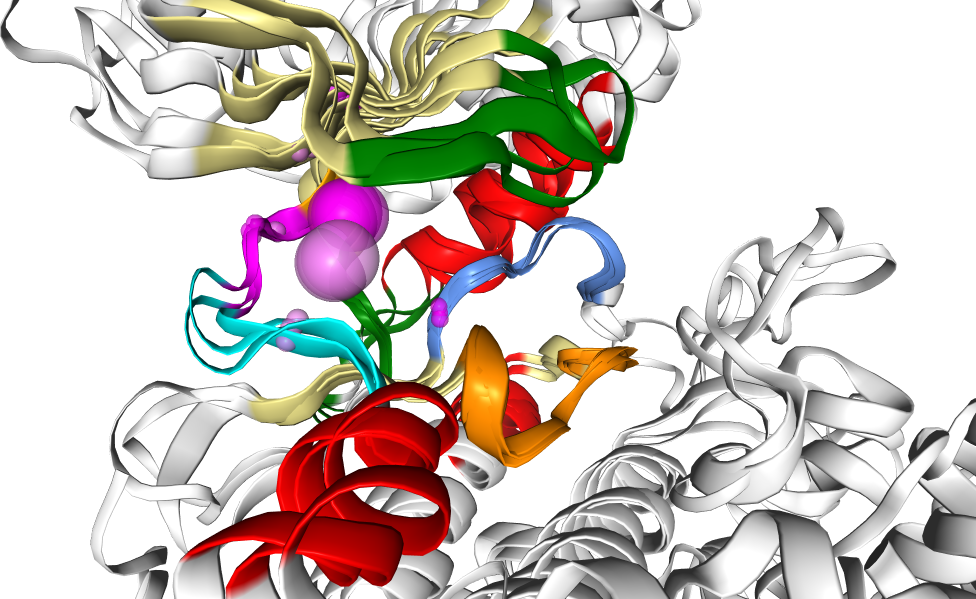

In [9]:
viewer.viewer._display_image()

### Subpocket: DFG region

In [10]:
# Anchor residues / subpockets
subpocket_names = ["dfg_kissim", "dfg_kfl"]
subpocket_colors = ["cyan", "cadetblue"]
anchor_residues = [[19, 24, 81], [18, 24, 70, 83]]

# Pockets
pockets = random_pockets(
    structures, 
    N_STRUCTURES, 
    SEED, 
    anchor_residues, 
    subpocket_names, 
    subpocket_colors, 
    session
)

# Viewer
viewer = PocketViewer()
for pocket in pockets:
    viewer.add_pocket(pocket, sphere_opacity=0.7, show_pocket_center=False)
viewer.viewer

|    | name       | anchors          | color     |
|---:|:-----------|:-----------------|:----------|
|  0 | dfg_kissim | [19, 24, 81]     | cyan      |
|  1 | dfg_kfl    | [18, 24, 70, 83] | cadetblue |

Structure KLIFS ID: 6443
Structure KLIFS ID: 6598
Structure KLIFS ID: 6144


NGLWidget()

In [11]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

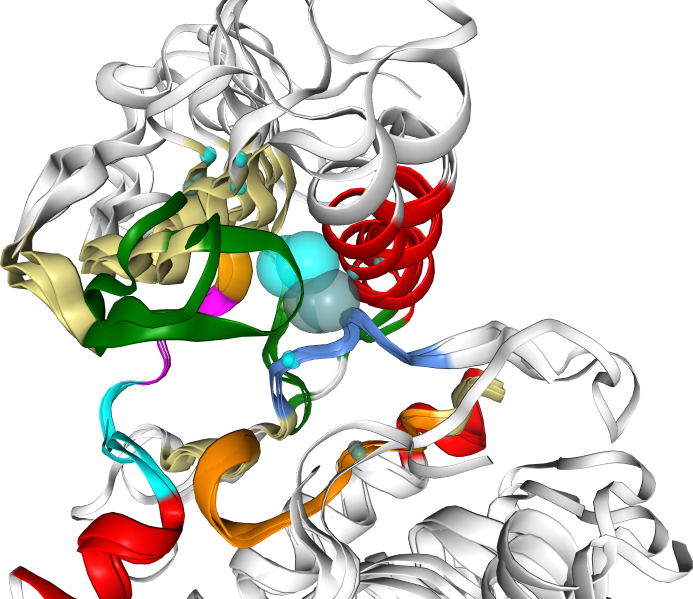

In [12]:
viewer.viewer._display_image()

### Subpocket: Front pocket

In [14]:
# Anchor residues / subpockets
subpocket_names = ["fp_kissim", "fp_kissim_6to10_75to72", "fp_kfl"]
subpocket_colors = ["green", "yellow", "olive"
]
anchor_residues = [[6, 48, 75], [10, 48, 72], [10, 51, 72, 81]]

# Pockets
pockets = random_pockets(
    structures, 
    N_STRUCTURES, 
    SEED, 
    anchor_residues, 
    subpocket_names, 
    subpocket_colors, 
    session
)

# Viewer
viewer = PocketViewer()
for pocket in pockets:
    viewer.add_pocket(pocket, sphere_opacity=0.7, show_pocket_center=False)
viewer.viewer

|    | name                   | anchors          | color   |
|---:|:-----------------------|:-----------------|:--------|
|  0 | fp_kissim              | [6, 48, 75]      | green   |
|  1 | fp_kissim_6to10_75to72 | [10, 48, 72]     | yellow  |
|  2 | fp_kfl                 | [10, 51, 72, 81] | olive   |

Structure KLIFS ID: 11102
Structure KLIFS ID: 11410


INFO:opencadd.structure.pocket.core:Pocket 11410 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 11410 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


Structure KLIFS ID: 2110


NGLWidget()

In [15]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

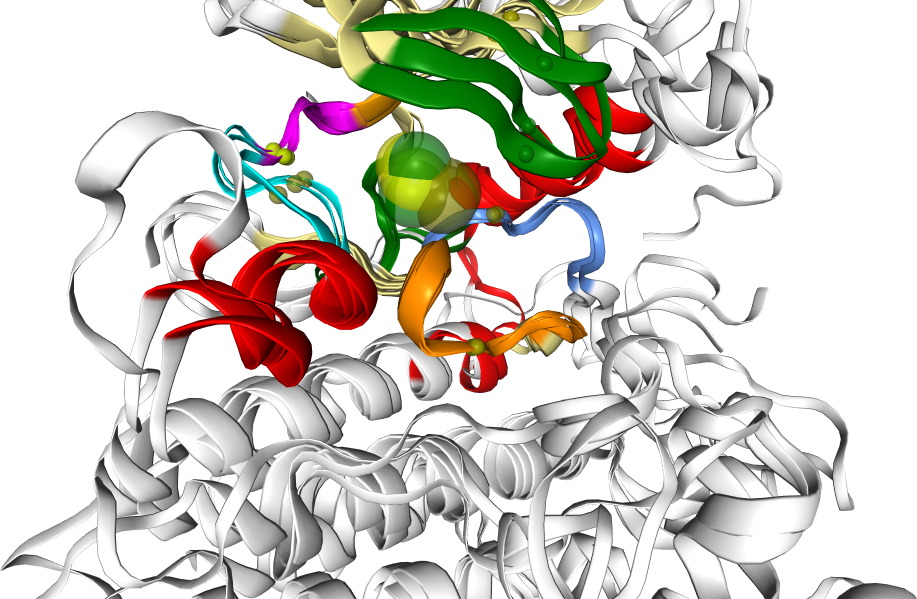

In [16]:
viewer.viewer._display_image()

Let's try out also all version that were proposed by Andrea Volkamer (this time only ONE random structure - otherwise the view gets too crowded.

In [17]:
# Anchor residues / subpockets
subpocket_names = [
    "fp_kissim", 
    "fp_kissim_6to4", 
    "fp_kissim_6to10",
    "fp_kissim_6to10_75to81",
    "fp_kissim_6to10_75to72",
    "fp_kfl",
    "fp_kfl_no81"
]
subpocket_colors = [
    "green", 
    "magenta", 
    "violet",
    "red",
    "yellow",
    "olive",
    "cornflowerblue"
]
anchor_residues = [ 
    [6, 48, 75], 
    [4, 48, 75],
    [10, 48, 75], 
    [10, 48, 81],
    [10, 48, 72],
    [10, 51, 72, 81],
    [10, 51, 72]
]

# Pockets
pockets = random_pockets(
    structures, 
    1, 
    SEED, 
    anchor_residues, 
    subpocket_names, 
    subpocket_colors, 
    session
)

# Viewer
viewer = PocketViewer()
for pocket in pockets:
    viewer.add_pocket(pocket, sphere_opacity=0.7, show_pocket_center=False)
viewer.viewer

|    | name                   | anchors          | color          |
|---:|:-----------------------|:-----------------|:---------------|
|  0 | fp_kissim              | [6, 48, 75]      | green          |
|  1 | fp_kissim_6to4         | [4, 48, 75]      | magenta        |
|  2 | fp_kissim_6to10        | [10, 48, 75]     | violet         |
|  3 | fp_kissim_6to10_75to81 | [10, 48, 81]     | red            |
|  4 | fp_kissim_6to10_75to72 | [10, 48, 72]     | yellow         |
|  5 | fp_kfl                 | [10, 51, 72, 81] | olive          |
|  6 | fp_kfl_no81            | [10, 51, 72]     | cornflowerblue |

Structure KLIFS ID: 6666


NGLWidget()

In [19]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

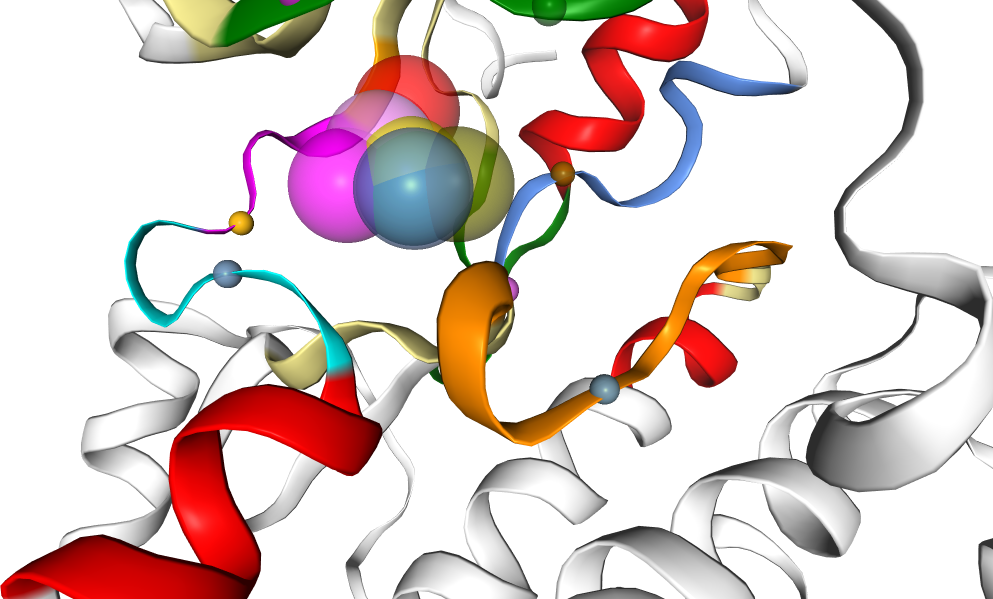

In [20]:
viewer.viewer._display_image()

## Selected anchor residues

Now show a few random structures with subpockets based on the selected anchor residues.

In [24]:
# Anchor residues / subpockets
subpocket_names = ["hinge_region", "dfg_region", "front_pocket"]
subpocket_colors = ["magenta", "cornflowerblue", "green"]
anchor_residues = [[16, 47, 80], [19, 24, 81], [10, 48, 72]]

# Pockets
pockets = random_pockets(
    structures, 
    N_STRUCTURES, 
    SEED, 
    anchor_residues, 
    subpocket_names, 
    subpocket_colors, 
    session
)

# Viewer
viewer = PocketViewer()
for pocket in pockets:
    viewer.add_pocket(pocket, sphere_opacity=0.7, show_pocket_center=False)
viewer.viewer

|    | name         | anchors      | color          |
|---:|:-------------|:-------------|:---------------|
|  0 | hinge_region | [16, 47, 80] | magenta        |
|  1 | dfg_region   | [19, 24, 81] | cornflowerblue |
|  2 | front_pocket | [10, 48, 72] | green          |

Structure KLIFS ID: 10982


INFO:opencadd.structure.pocket.core:Pocket 10982 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 10982 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


Structure KLIFS ID: 10056


INFO:opencadd.structure.pocket.core:Pocket 10056 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '84'), ('_', '85')]
INFO:opencadd.structure.pocket.core:Pocket 10056 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '84'), (None, '85')]


Structure KLIFS ID: 11408


INFO:opencadd.structure.pocket.core:Pocket 11408 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 11408 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


NGLWidget()

In [25]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

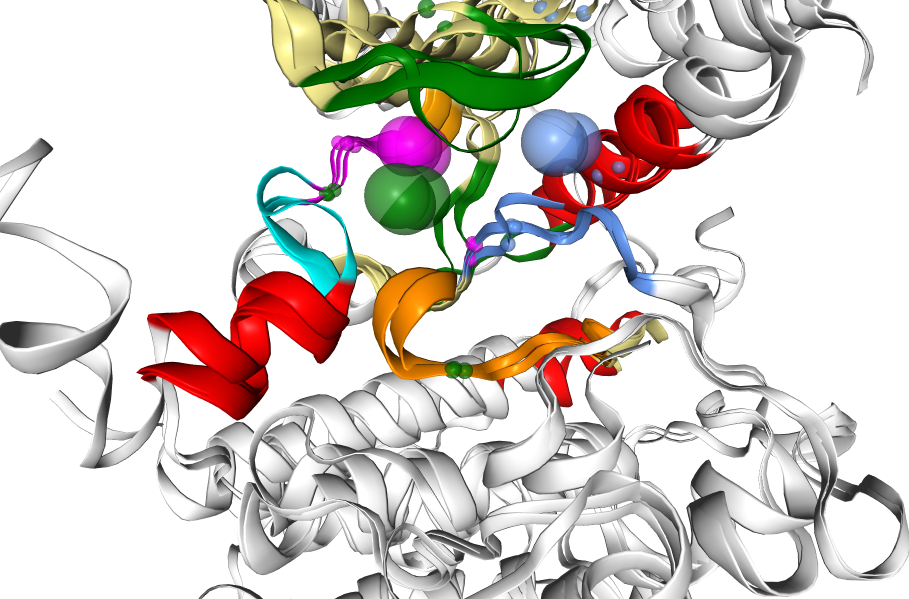

In [26]:
viewer.viewer._display_image()